In [121]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def gaussian_mech(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

compas = pd.read_csv('https://github.com/twiemold/CS211_Thomas_Wiemold_Final_Project/raw/main/compas-scores-two-years.csv')

idxs_to_drop = []
for i in range(len(compas)):
        if compas['is_recid'][i] == -1:
            idxs_to_drop.append(i)
        elif compas['c_charge_degree'][i] == "O":
            idxs_to_drop.append(i)
        elif compas['score_text'][i] == 'N/A':
            idxs_to_drop.append(i)
        elif compas['v_score_text'][i] == 'N/A':
            idxs_to_drop.append(i)
        elif compas['days_b_screening_arrest'][i]  >= 30:
            idxs_to_drop.append(i)
        elif compas['days_b_screening_arrest'][i]  <= -30:
            idxs_to_drop.append(i)
        else:
            i += 1
for i in range(len(idxs_to_drop)):
    compas.drop(
        labels = [idxs_to_drop[i]],
        axis = 0,
        inplace = True
    )
            
            
            
            
            
            
            

In [132]:
compas

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [140]:
def two_year_recid_count(epsilon):
    count = len(compas[compas['two_year_recid'] == 1])
    return laplace_mech(count, 1, epsilon)

two_year_recid_count(1.0)

2855.753849966559

In [151]:
def sex_percentages(epsilon):
    male_count = len(compas[compas['sex'] == 'Male'])
    female_count = len(compas[compas['sex'] == 'Female'])
    total_count = len(compas)
    dp_male_count = laplace_mech(male_count, 1, epsilon/3)
    dp_female_count = laplace_mech(female_count, 1, epsilon/3)
    dp_total = laplace_mech(total_count, 1, epsilon/3)
    male_percent = (dp_male_count / dp_total) * 100
    female_percent = (dp_female_count / dp_total) * 100
    return male_percent, female_percent
    

sex_percentages(1.0)

(80.8806758407504, 19.121717452588623)

In [143]:
def dp_crosstab_sex_race(epsilon):
    return pd.crosstab(compas['race'], compas['sex']).applymap(lambda x: laplace_mech(x, 1, epsilon))

dp_crosstab_sex_race(1.0)

sex,Female,Male
race,,
African-American,579.641122,2748.717546
Asian,1.661167,29.871371
Caucasian,502.223383,1669.439577
Hispanic,90.211963,471.594716
Native American,4.026036,11.157297
Other,62.826691,295.853538


In [142]:
def dp_crosstab_decile_race(epsilon):
    return pd.crosstab(compas['race'], compas['decile_score']).applymap(lambda x: laplace_mech(x, 1, epsilon))

dp_crosstab_decile_race(1.0)

decile_score,1,2,3,4,5,6,7,8,9,10
race,,,,,,,,,,
African-American,377.798605,364.263961,314.053394,346.788537,337.205756,339.597171,358.783618,315.166889,333.707029,242.682072
Asian,15.259786,4.286111,3.519246,-3.000476,1.954730,2.067257,1.790694,2.674667,-0.674825,-1.281169
Caucasian,629.201114,329.249878,248.323092,250.848085,207.979060,165.254364,117.864603,98.115187,79.319072,49.569634
Hispanic,174.000964,97.564793,80.703000,44.496109,42.516254,30.349134,29.070814,18.116298,17.390733,11.554347
Native American,0.241449,2.477586,-0.449364,0.067619,-0.243410,2.215881,2.451265,0.025602,2.355577,4.074676
Other,147.345444,64.387270,33.973669,41.151654,18.781985,19.579242,10.257741,6.808797,8.553206,2.173880


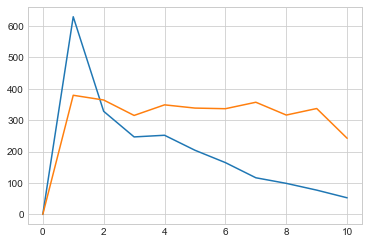

In [123]:
def score_race_hist(epsilon, race):
    # uses parallel composition, histogram
    counts = [len(compas[(compas['decile_score'] == i) & (compas['race'] == race)]) for i in range(0,11)]
    noisy_counts = [laplace_mech(c, 1, epsilon) for c in counts]
    return noisy_counts

plt.plot(score_race_hist(1.0, 'Caucasian'));
plt.plot(score_race_hist(1.0, 'African-American'));

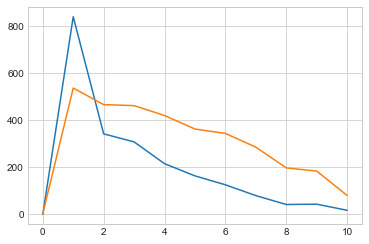

In [125]:
def score_race_violent_hist(epsilon, race):
    # uses parallel composition, histogram
    counts = [len(compas[(compas['v_decile_score'] == i) & (compas['race'] == race)]) for i in range(0,11)]
    noisy_counts = [laplace_mech(c, 1, epsilon) for c in counts]
    return noisy_counts

plt.plot(score_race_violent_hist(1.0, 'Caucasian'));
plt.plot(score_race_violent_hist(1.0, 'African-American'));